In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [40]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [42]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [70]:
def plot_sample(X,y,index):
  
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [45]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

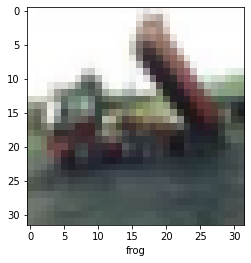

In [46]:
plot_sample(X_train,y_train,0)

In [47]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
# ann=models.Sequential([
#     layers.Flatten(input_shape=(32,32,3)),
#     layers.Dense(3000,activation='relu'),
#     layers.Dense(3000,activation='relu'),
#     layers.Dense(10,activation='sigmoid')
# ]
# )
# ann.compile(
#     optimizer='SGD',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy'])

# ann.fit(X_train,y_train,epochs=5)

In [48]:
cnn1=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    ])

In [49]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
cnn1.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 27ms/step - loss: 1.4412 - accuracy: 0.4836
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0749 - accuracy: 0.6248
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9573 - accuracy: 0.6676
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8690 - accuracy: 0.6980
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8001 - accuracy: 0.7213
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7449 - accuracy: 0.7420
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6947 - accuracy: 0.7599
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6469 - accuracy: 0.7757
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6071 - accuracy: 0.7886
Epoch 10/10
1563/1563 [==============================] - 43s 27m

In [51]:
cnn1.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9230 - accuracy: 0.7041


[0.9229913353919983, 0.7041000127792358]

In [52]:

cnn1.predict(X_test[[0]])

1/1 [==============================] - 0s 70ms/step


array([[2.4976202e-05, 5.4152233e-06, 5.8225880e-04, 9.6585286e-01,
        1.3209192e-05, 2.1397881e-02, 2.9991302e-03, 9.2371738e-05,
        9.0251137e-03, 6.6965058e-06]], dtype=float32)

In [53]:
X_test.shape

(10000, 32, 32, 3)

In [54]:
y_pred=cnn1.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [55]:
y_res= [np.argmax(i) for i in y_pred]

In [56]:
y_res[:5]

[3, 8, 8, 0, 4]

In [57]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [58]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

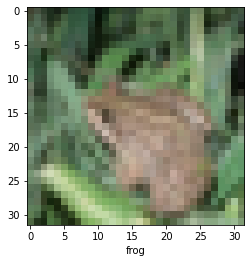

In [77]:
plot_sample(X_test,y_test,4)

In [78]:
from sklearn.metrics import confusion_matrix , classification_report

In [79]:
print("Classification Report: \n", classification_report(y_test, y_res))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.76      0.72      1000
           1       0.83      0.81      0.82      1000
           2       0.61      0.56      0.58      1000
           3       0.55      0.49      0.52      1000
           4       0.68      0.64      0.66      1000
           5       0.63      0.59      0.61      1000
           6       0.79      0.77      0.78      1000
           7       0.71      0.80      0.75      1000
           8       0.76      0.85      0.80      1000
           9       0.76      0.77      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

